Milestone 3: Deep Learning Model + Explainability

Week 5

In [9]:
# Import essential libraries for machine learning and visualization
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Confirm the libraries are imported
print("Libraries imported successfully!")

Libraries imported successfully!


In [10]:
# Define all necessary parameters for training the CNN

IMG_SIZE = (256, 256)    # Resize all images to 256x256 pixels
BATCH_SIZE = 32           # Number of images processed per batch during training
EPOCHS = 20               # Number of training iterations over the dataset
LEARNING_RATE = 0.001     # Learning rate for model optimizer

# Dataset folder path – update this to where your images are stored
DATASET_DIR = r"C:\msys64\home\Raghav Thaman\internship\data\SUPATLANTIQUE_PROC"

num_classes = 3          # Number of scanner classes in your dataset

print("Parameters set!")

Parameters set!


In [11]:
# Apply data augmentation to training images to improve generalization

train_datagen = ImageDataGenerator(
    rescale=1./255,             # Normalize pixel values between 0 and 1
    rotation_range=10,           # Randomly rotate images up to 10 degrees
    brightness_range=[0.8, 1.2], # Randomly change image brightness
    zoom_range=0.1,              # Randomly zoom in/out by up to 10%
    validation_split=0.2         # Use 20% of the data for validation
)

# Load training images with augmentation
train_generator = train_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=IMG_SIZE,
    color_mode='grayscale',
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'   # Training data split
)

# Load validation images without augmentation
validation_generator = train_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=IMG_SIZE,
    color_mode='grayscale',
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation' # Validation data split
)

# Check how classes are indexed
print("Classes found:", train_generator.class_indices)

Found 5523 images belonging to 5 classes.
Found 1378 images belonging to 5 classes.
Classes found: {'Flatfield': 0, 'Flatfield_Preprocessed': 1, 'Officials': 2, 'Preprocessed': 3, 'Wikipedia': 4}


In [12]:
# Create the CNN model architecture layer by layer

model = Sequential([
    # First convolutional layer with 32 filters
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 1)),
    MaxPooling2D(2, 2),  # Reduce spatial dimensions

    # Second convolutional layer with 64 filters
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Third convolutional layer with 128 filters
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Flatten the feature maps into a single vector
    Flatten(),

    # Fully connected dense layer
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout layer to prevent overfitting

    # Output layer with softmax activation for classification into num_classes
    Dense(num_classes, activation='softmax')
])

# Compile the model with Adam optimizer and categorical crossentropy loss
model.compile(optimizer=Adam(learning_rate=LEARNING_RATE),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model architecture
model.summary()

c:\msys64\home\Raghav Thaman\internship\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,838,787 (56.61 MB)

 Trainable params: 14,838,787 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Train the CNN model using the training and validation generators

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=EPOCHS
)

print("Model training completed!")

c:\msys64\home\Raghav Thaman\internship\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 163s 1s/step - accuracy: 0.7972 - loss: 0.4335 - val_accuracy: 0.9248 - val_loss: 0.1600
Epoch 2/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 125s 1s/step - accuracy: 0.9295 - loss: 0.1814 - val_accuracy: 0.9629 - val_loss: 0.1019
Epoch 3/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 131s 1s/step - accuracy: 0.9597 - loss: 0.1028 - val_accuracy: 0.9760 - val_loss: 0.0627
Epoch 4/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.9673 - loss: 0.0779 - val_accuracy: 0.9902 - val_loss: 0.0485
Epoch 5/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 120s 1s/step - accuracy: 0.9720 - loss: 0.0784 - val_accuracy: 0.9727 - val_loss: 0.0637
Epoch 6/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.9823 - loss: 0.0540 - val_accuracy: 0.9935 - val_loss: 0.0242
Epoch 7/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 125s 1s/step - accuracy: 0.9899 - loss: 0.0322 - val_accuracy: 0.9967 - val_loss: 0.0138
Epoch 8/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 119s 1s/step - accuracy: 0.9899 - loss: 0.0306 - val_accu

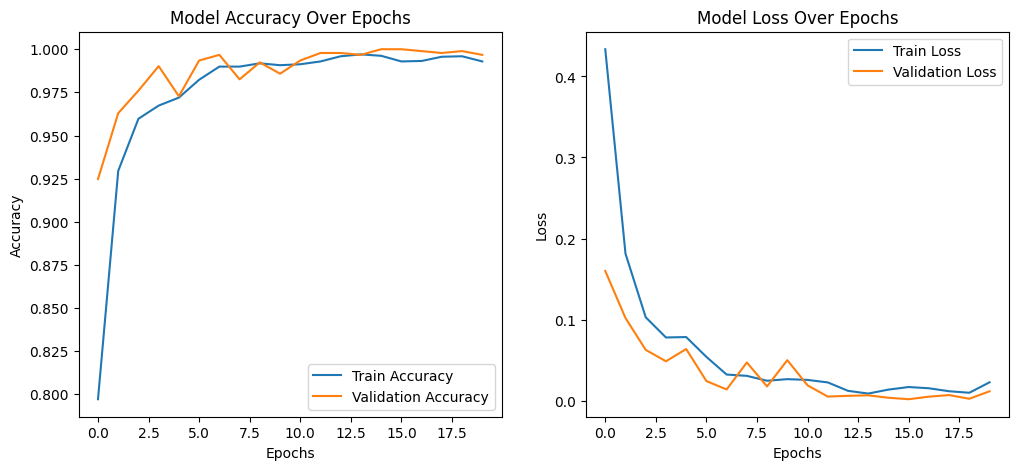

In [7]:
# Visualize how the model’s accuracy and loss change during training

plt.figure(figsize=(12, 5))

# Plot training vs validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy Over Epochs')

# Plot training vs validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss Over Epochs')

# Show the plots
plt.show()

In [12]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(validation_generator)

print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
print(f"Validation Loss: {val_loss:.4f}")

29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 328ms/step - accuracy: 0.9945 - loss: 0.0119
Validation Accuracy: 99.45%
Validation Loss: 0.0119


In [9]:
import numpy as np

# Get a batch of images and labels from the validation set
images, labels = next(validation_generator)

# Predict using the model
predictions = model.predict(images)

# Get the predicted class indices
predicted_classes = np.argmax(predictions, axis=1)

# Get the true class indices
true_classes = np.argmax(labels, axis=1)

# Display results for the first few images
for i in range(5):
    print(f"Image {i+1}: True class = {true_classes[i]}, Predicted class = {predicted_classes[i]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
Image 1: True class = 2, Predicted class = 2
Image 2: True class = 2, Predicted class = 2
Image 3: True class = 1, Predicted class = 1
Image 4: True class = 1, Predicted class = 1
Image 5: True class = 2, Predicted class = 2


Week 6

29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 265ms/step


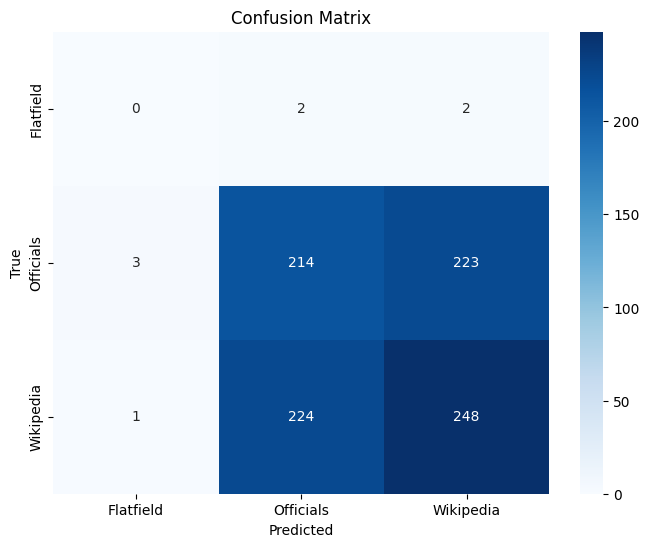

Classification Report:

              precision    recall  f1-score   support

   Flatfield       0.00      0.00      0.00         4
   Officials       0.49      0.49      0.49       440
   Wikipedia       0.52      0.52      0.52       473

    accuracy                           0.50       917
   macro avg       0.34      0.34      0.34       917
weighted avg       0.50      0.50      0.50       917



In [ ]:
# Import required libraries for evaluation and visualization
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Use the trained model to predict on all validation images
Y_pred = model.predict(validation_generator)

# Convert predicted probabilities to class labels (index of the maximum probability for each sample)
y_pred = np.argmax(Y_pred, axis=1)

# Get the true class labels from the validation data generator
y_true = validation_generator.classes

# Generate the confusion matrix (actual labels vs predicted labels)
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix using a heatmap for better visualization
plt.figure(figsize=(8,6))
sns.heatmap(
    cm,
    annot=True,                                   # Show numbers inside the heatmap cells
    fmt="d",                                      # Format as integer
    cmap="Blues",                                 # Color map style
    xticklabels=validation_generator.class_indices.keys(), # X-axis labels (predicted classes)
    yticklabels=validation_generator.class_indices.keys()  # Y-axis labels (true classes)
)
plt.xlabel("Predicted")                           # X-axis label
plt.ylabel("True")                                # Y-axis label
plt.title("Confusion Matrix")                     # Plot title
plt.show()                                        # Display the heatmap

# Print a detailed classification report (precision, recall, f1-score, support)
print("Classification Report:\n")
print(
    classification_report(
        y_true, 
        y_pred, 
        target_names=list(validation_generator.class_indices.keys())  # Use class names instead of indices
    )
)

In [11]:
# Save the trained CNN model
model.save("scanner_id_model.h5")
print("Model saved successfully!")

Model saved successfully!


In [4]:
from tensorflow.keras.models import load_model

# Load the trained model from file
model = load_model('scanner_id_model.h5')

print("Model loaded successfully!")


Model loaded successfully!


In [ ]:
# Import ImageDataGenerator for image preprocessing and augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define constants for image size and batch size
IMG_SIZE = (256, 256)   # Resize all images to 256x256 pixels
BATCH_SIZE = 32         # Number of images to process in each batch
DATASET_DIR = r"C:\msys64\home\Raghav Thaman\internship\data\SUPATLANTIQUE_PROC"  # Path to dataset directory

# Create an ImageDataGenerator with rescaling and validation split
# - Rescale: normalize pixel values to [0,1] by dividing by 255
# - validation_split: reserve 20% of data for validation
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Create the training data generator
train_generator = datagen.flow_from_directory(
    DATASET_DIR,                # Root directory containing class subfolders
    target_size=IMG_SIZE,       # Resize images to (256, 256)
    color_mode='grayscale',     # Load images in grayscale (1 channel instead of 3 for RGB)
    batch_size=BATCH_SIZE,      # Number of images per batch
    class_mode='categorical',   # For multi-class classification (one-hot encoded labels)
    subset='training'           # Use the training split (80%)
)

# Create the validation data generator
validation_generator = datagen.flow_from_directory(
    DATASET_DIR,                # Same dataset directory
    target_size=IMG_SIZE,       # Resize images to (256, 256)
    color_mode='grayscale',     # Load images in grayscale
    batch_size=BATCH_SIZE,      # Number of images per batch
    class_mode='categorical',   # Multi-class classification
    subset='validation'         # Use the validation split (20%)
)

# Print the mapping of class names to integer labels
print("Classes:", train_generator.class_indices)

Found 3673 images belonging to 3 classes.
Found 917 images belonging to 3 classes.
Classes: {'Flatfield': 0, 'Officials': 1, 'Wikipedia': 2}


In [ ]:
# Import required libraries
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Compute class weights to handle class imbalance in the dataset
# 'balanced' mode automatically adjusts weights inversely proportional to class frequencies
# - classes: unique class labels in the dataset
# - y: actual class labels for all samples in the validation set
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(validation_generator.classes),   # Unique class IDs
    y=validation_generator.classes                     # True labels of validation set
)

# Convert the array of weights into a dictionary
# Example: {0: weight_for_class0, 1: weight_for_class1, ...}
class_weight_dict = dict(enumerate(class_weights))

# Print the computed class weights
# These weights can be passed to model.fit(..., class_weight=class_weight_dict) to reduce bias
print("Class weights:", class_weight_dict)

Class weights: {0: np.float64(76.41666666666667), 1: np.float64(0.6946969696969697), 2: np.float64(0.6462297392529951)}


In [ ]:
# Import required libraries for building the CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define image size, number of classes, and learning rate
IMG_SIZE = (256, 256)    # Input images are resized to 256x256
num_classes = 3          # Number of output classes (update if your dataset has more/less)
LEARNING_RATE = 0.001    # Learning rate for optimizer

# Build a CNN using Sequential API
model = Sequential([

    # Convolution layer 1: 32 filters, 3x3 kernel, ReLU activation
    # Input shape: (256, 256, 1) → grayscale images with 1 channel
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 1)),
    MaxPooling2D(2, 2),   # Downsample feature maps by taking max over 2x2 regions

    # Convolution layer 2: 64 filters
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),   # Further downsampling

    # Convolution layer 3: 128 filters
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),   # Further downsampling

    # Flatten the 2D feature maps into a 1D vector
    Flatten(),

    # Fully connected dense layer with 128 neurons
    Dense(128, activation='relu'),

    # Dropout layer to prevent overfitting (randomly drops 50% of neurons during training)
    Dropout(0.5),

    # Output layer with softmax activation for multi-class classification
    Dense(num_classes, activation='softmax')
])

# Compile the model
# - Optimizer: Adam with specified learning rate
# - Loss: categorical crossentropy (since it's a multi-class problem with one-hot labels)
# - Metrics: track accuracy during training/validation
model.compile(
    optimizer=Adam(learning_rate=LEARNING_RATE),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print the model summary (architecture, parameters per layer, total parameters)
model.summary()

c:\msys64\home\Raghav Thaman\internship\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,838,787 (56.61 MB)

 Trainable params: 14,838,787 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the CNN model
history = model.fit(
    train_generator,                   # Training data generator
    validation_data=validation_generator,  # Validation data generator
    epochs=20,                         # Number of training epochs
    class_weight=class_weight_dict     # Apply class weights to handle class imbalance
)

Epoch 1/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6730 - loss: 1.6663

c:\msys64\home\Raghav Thaman\internship\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


115/115 ━━━━━━━━━━━━━━━━━━━━ 155s 1s/step - accuracy: 0.8255 - loss: 1.3750 - val_accuracy: 0.9662 - val_loss: 0.1154
Epoch 2/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.9641 - loss: 0.1200 - val_accuracy: 0.9913 - val_loss: 0.0110
Epoch 3/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.9891 - loss: 0.0245 - val_accuracy: 1.0000 - val_loss: 0.0031
Epoch 4/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 119s 1s/step - accuracy: 0.9956 - loss: 0.0102 - val_accuracy: 1.0000 - val_loss: 8.3812e-04
Epoch 5/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 119s 1s/step - accuracy: 0.9978 - loss: 0.0061 - val_accuracy: 0.9978 - val_loss: 0.0037
Epoch 6/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 128s 1s/step - accuracy: 0.9975 - loss: 0.0063 - val_accuracy: 0.9880 - val_loss: 0.0357
Epoch 7/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.9951 - loss: 0.0128 - val_accuracy: 0.9978 - val_loss: 0.0053
Epoch 8/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 114s 995ms/step - accuracy: 0.9992 - loss: 0.0038 - val_accuracy

In [ ]:
pip install opencv-python numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


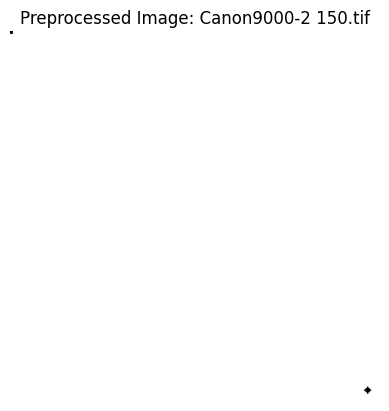

In [ ]:
# Import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Define a fixed image size for model input
IMG_SIZE = (256, 256)

# -------------------------
# Preprocessing function
# -------------------------
def preprocess_image(img_path):
    # Load image in grayscale mode (1 channel instead of 3 for RGB)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    # If image loading fails, raise an error
    if img is None:
        raise ValueError("Image not found: " + img_path)
    
    # Apply Gaussian Blur to reduce noise and smooth the image
    img_denoised = cv2.GaussianBlur(img, (5, 5), 0)
    
    # Apply histogram equalization to improve contrast
    img_eq = cv2.equalizeHist(img_denoised)
    
    # Resize image to fixed dimensions (256x256)
    img_resized = cv2.resize(img_eq, IMG_SIZE)
    
    # Normalize pixel values to [0,1] range
    img_normalized = img_resized / 255.0
    
    return img_normalized

# -------------------------
# Load and preprocess a sample image
# -------------------------
# Path to the dataset folder (update as needed)
folder_path = r"C:\msys64\home\Raghav Thaman\internship\data\SUPATLANTIQUE_PROC\Flatfield\Canon9000-2"

# Select one image file for testing (here: 150.tif)
sample_img_path = os.path.join(folder_path, "150.tif")

# Apply preprocessing
sample_image = preprocess_image(sample_img_path)

# -------------------------
# Display the preprocessed image
# -------------------------
plt.imshow(sample_image, cmap='gray')   # Show as grayscale
plt.title("Preprocessed Image: Canon9000-2 150.tif")  # Title with image info
plt.axis('off')  # Remove axis ticks for clarity
plt.show()

In [15]:
# Loop through all scanner folders and preprocess each image
base_folder = r"C:\msys64\home\Raghav Thaman\internship\data\SUPATLANTIQUE_PROC\Flatfield"

for scanner in os.listdir(base_folder):
    scanner_folder = os.path.join(base_folder, scanner)
    if os.path.isdir(scanner_folder):
        for img_file in os.listdir(scanner_folder):
            if img_file.endswith(".tif") or img_file.endswith(".png") or img_file.endswith(".jpg"):
                img_path = os.path.join(scanner_folder, img_file)
                try:
                    processed_img = preprocess_image(img_path)
                    print(f"Preprocessed: {scanner}/{img_file}")
                    # Optionally, save or store processed_img
                except ValueError as e:
                    print(e)


Preprocessed: Canon120-1/150.tif
Preprocessed: Canon120-1/300.tif
Preprocessed: Canon120-2/150.tif
Preprocessed: Canon120-2/300.tif
Preprocessed: Canon220/150.tif
Preprocessed: Canon220/300.tif
Preprocessed: Canon9000-1/150.tif
Preprocessed: Canon9000-1/300.tif
Preprocessed: Canon9000-2/150.tif
Preprocessed: Canon9000-2/300.tif
Preprocessed: EpsonV370-1/150.tif
Preprocessed: EpsonV370-1/300.tif
Preprocessed: EpsonV370-2/150.tif
Preprocessed: EpsonV370-2/300.tif
Preprocessed: EpsonV39-1/150.tif
Preprocessed: EpsonV39-1/300.tif
Preprocessed: EpsonV39-2/150.tif
Preprocessed: EpsonV39-2/300.tif
Preprocessed: EpsonV550/150.tif
Preprocessed: EpsonV550/300.tif
Preprocessed: HP/150.tif
Preprocessed: HP/300.tif


In [ ]:
# Define the output base folder where preprocessed images will be saved
output_base = r"C:\msys64\home\Raghav Thaman\internship\data\SUPATLANTIQUE_PROC\Flatfield_Preprocessed"

# Loop over each scanner folder inside the base dataset
for scanner in os.listdir(base_folder):
    scanner_folder = os.path.join(base_folder, scanner)
    
    # Process only if it's a directory (ignore files at root level)
    if os.path.isdir(scanner_folder):
        # Create a corresponding output folder for this scanner
        output_folder = os.path.join(output_base, scanner)
        os.makedirs(output_folder, exist_ok=True)  # Create if not exists
        
        # Loop over all image files inside the scanner folder
        for img_file in os.listdir(scanner_folder):
            # Process only supported image formats
            if img_file.endswith(".tif") or img_file.endswith(".png") or img_file.endswith(".jpg"):
                img_path = os.path.join(scanner_folder, img_file)
                
                # Apply preprocessing (defined earlier)
                processed_img = preprocess_image(img_path)
                
                # Convert back from normalized [0,1] float to [0,255] uint8 for saving
                processed_img_uint8 = (processed_img * 255).astype(np.uint8)
                
                # Save preprocessed image to the corresponding output folder
                output_path = os.path.join(output_folder, img_file)
                cv2.imwrite(output_path, processed_img_uint8)
                
                # Print confirmation
                print(f"Saved: {output_path}")

Saved: C:\msys64\home\Raghav Thaman\internship\data\SUPATLANTIQUE_PROC\Flatfield_Preprocessed\Canon120-1\150.tif
Saved: C:\msys64\home\Raghav Thaman\internship\data\SUPATLANTIQUE_PROC\Flatfield_Preprocessed\Canon120-1\300.tif
Saved: C:\msys64\home\Raghav Thaman\internship\data\SUPATLANTIQUE_PROC\Flatfield_Preprocessed\Canon120-2\150.tif
Saved: C:\msys64\home\Raghav Thaman\internship\data\SUPATLANTIQUE_PROC\Flatfield_Preprocessed\Canon120-2\300.tif
Saved: C:\msys64\home\Raghav Thaman\internship\data\SUPATLANTIQUE_PROC\Flatfield_Preprocessed\Canon220\150.tif
Saved: C:\msys64\home\Raghav Thaman\internship\data\SUPATLANTIQUE_PROC\Flatfield_Preprocessed\Canon220\300.tif
Saved: C:\msys64\home\Raghav Thaman\internship\data\SUPATLANTIQUE_PROC\Flatfield_Preprocessed\Canon9000-1\150.tif
Saved: C:\msys64\home\Raghav Thaman\internship\data\SUPATLANTIQUE_PROC\Flatfield_Preprocessed\Canon9000-1\300.tif
Saved: C:\msys64\home\Raghav Thaman\internship\data\SUPATLANTIQUE_PROC\Flatfield_Preprocessed\Cano

In [17]:
import cv2
import numpy as np
import os

# Define image size
IMG_SIZE = (256, 256)

# Preprocessing function
def preprocess_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError("Image not found: " + img_path)
    img_denoised = cv2.GaussianBlur(img, (5, 5), 0)
    img_eq = cv2.equalizeHist(img_denoised)
    img_resized = cv2.resize(img_eq, IMG_SIZE)
    img_normalized = img_resized / 255.0
    return img_normalized

# Base folders
base_folder = r"C:\msys64\home\Raghav Thaman\internship\data\SUPATLANTIQUE_PROC"
output_base = r"C:\msys64\home\Raghav Thaman\internship\data\SUPATLANTIQUE_PROC\Preprocessed"

# Process Officials and Wikipedia
for dataset in ["Officials", "Wikipedia"]:
    dataset_folder = os.path.join(base_folder, dataset)
    output_folder = os.path.join(output_base, dataset)
    os.makedirs(output_folder, exist_ok=True)

    for scanner in os.listdir(dataset_folder):
        scanner_folder = os.path.join(dataset_folder, scanner)
        if os.path.isdir(scanner_folder):
            scanner_output = os.path.join(output_folder, scanner)
            os.makedirs(scanner_output, exist_ok=True)

            for img_file in os.listdir(scanner_folder):
                if img_file.endswith(".tif") or img_file.endswith(".png") or img_file.endswith(".jpg"):
                    img_path = os.path.join(scanner_folder, img_file)
                    try:
                        processed_img = preprocess_image(img_path)
                        # Convert back to uint8 before saving
                        processed_img_uint8 = (processed_img * 255).astype(np.uint8)
                        output_path = os.path.join(scanner_output, img_file)
                        cv2.imwrite(output_path, processed_img_uint8)
                        print(f"Saved: {output_path}")
                    except ValueError as e:
                        print(e)


In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to the preprocessed images
preprocessed_data_path = r"C:\msys64\home\Raghav Thaman\internship\data\SUPATLANTIQUE_PROC\Preprocessed"

# Setup ImageDataGenerator with rescaling
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Training generator for Officials and Wikipedia combined
train_generator = train_datagen.flow_from_directory(
    preprocessed_data_path,
    target_size=IMG_SIZE,
    color_mode="grayscale",
    batch_size=32,
    class_mode="categorical",
    subset="training"
)

validation_generator = train_datagen.flow_from_directory(
    preprocessed_data_path,
    target_size=IMG_SIZE,
    color_mode="grayscale",
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)

print("Training and validation generators are ready!")


Found 1832 images belonging to 2 classes.
Found 457 images belonging to 2 classes.
Training and validation generators are ready!


In [40]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load pretrained ResNet50 model without top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False

# Compile model
model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


In [34]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Concatenate
from tensorflow.keras.models import Model

num_handcrafted_features = 10  # Example, update based on actual features
num_classes = 3

# Image input
image_input = Input(shape=(256, 256, 1))
x = Conv2D(32, (3,3), activation='relu')(image_input)
x = MaxPooling2D(2,2)(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)

# Handcrafted features input
feature_input = Input(shape=(num_handcrafted_features,))
y = Dense(64, activation='relu')(feature_input)

# Merge
combined = Concatenate()([x, y])
z = Dense(64, activation='relu')(combined)
output = Dense(num_classes, activation='softmax')(z)

model = Model(inputs=[image_input, feature_input], outputs=output)


In [ ]:
# Loop over both datasets ("Officials" and "Wikipedia")
for dataset in ["Officials", "Wikipedia"]:
    dataset_path = os.path.join(target_base, dataset)   # Full path to dataset
    
    print(f"\nContents of {dataset}:")   # Print dataset name
    
    # Loop through each scanner folder inside the dataset
    for scanner in os.listdir(dataset_path):
        scanner_path = os.path.join(dataset_path, scanner)
        
        # Process only if it's a directory (ignore stray files)
        if os.path.isdir(scanner_path):
            # List all files inside the scanner folder
            files = os.listdir(scanner_path)
            
            # Print scanner name and number of images found
            print(f"  {scanner}: {len(files)} images")


Contents of Officials:
  Canon120-1: 100 images
  Canon120-2: 100 images
  Canon220: 100 images
  Canon9000-1: 100 images
  Canon9000-2: 100 images
  EpsonV370-1: 100 images
  EpsonV370-2: 100 images
  EpsonV39-1: 100 images
  EpsonV39-2: 100 images
  EpsonV550: 100 images
  HP: 100 images

Contents of Wikipedia:
  Canon120-1: 108 images
  Canon120-2: 108 images
  Canon220: 108 images
  Canon9000-1: 108 images
  Canon9000-2: 108 images
  EpsonV370-1: 108 images
  EpsonV370-2: 109 images
  EpsonV39-1: 108 images
  EpsonV39-2: 108 images
  EpsonV550: 108 images
  HP: 108 images


In [ ]:
# Import ImageDataGenerator for preprocessing and augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define target image size
IMG_SIZE = (256, 256)

# Path to the folder containing preprocessed images
preprocessed_data_path = r"C:\msys64\home\Raghav Thaman\internship\data\SUPATLANTIQUE_PROC\Preprocessed"

# --------------------------------------
# Create ImageDataGenerator with:
# - Rescaling: normalize pixel values to [0,1]
# - Validation split: 20% of data for validation
# --------------------------------------
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# --------------------------------------
# Training data generator
# --------------------------------------
train_generator = train_datagen.flow_from_directory(
    preprocessed_data_path,      # Path to preprocessed dataset
    target_size=IMG_SIZE,        # Resize images to (256,256)
    color_mode="grayscale",      # Images are grayscale (1 channel)
    batch_size=32,               # Number of images per batch
    class_mode="categorical",    # Multi-class classification (one-hot labels)
    subset="training"            # Use the training subset (80%)
)

# --------------------------------------
# Validation data generator
# --------------------------------------
validation_generator = train_datagen.flow_from_directory(
    preprocessed_data_path,      # Same dataset path
    target_size=IMG_SIZE,        # Resize to (256,256)
    color_mode="grayscale",      # Grayscale input
    batch_size=32,               # Batch size
    class_mode="categorical",    # Multi-class classification
    subset="validation"          # Use the validation subset (20%)
)

Found 1832 images belonging to 2 classes.
Found 457 images belonging to 2 classes.


In [42]:
print("Classes found:", train_generator.class_indices)
print("Training samples:", train_generator.samples)
print("Validation samples:", validation_generator.samples)


Classes found: {'Officials': 0, 'Wikipedia': 1}
Training samples: 1832
Validation samples: 457


In [ ]:
# Import ImageDataGenerator for preprocessing and augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define target image size
IMG_SIZE = (256, 256)

# Path to preprocessed dataset
preprocessed_data_path = r"C:\msys64\home\Raghav Thaman\internship\data\SUPATLANTIQUE_PROC\Preprocessed"

# --------------------------------------
# Create ImageDataGenerator with:
# - Rescaling: normalize pixel values to [0,1]
# - Validation split: 20% for validation
# - Data augmentation: rotate, change brightness, flip
# --------------------------------------
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,        # Reserve 20% of data for validation
    rotation_range=20,           # Random rotations up to ±20 degrees
    brightness_range=[0.8, 1.2], # Random brightness adjustment (80%–120%)
    horizontal_flip=True         # Randomly flip images horizontally
)

# --------------------------------------
# Training data generator (80% split + augmentation)
# --------------------------------------
train_generator = train_datagen.flow_from_directory(
    preprocessed_data_path,      # Dataset path
    target_size=IMG_SIZE,        # Resize all images to (256, 256)
    color_mode="grayscale",      # Use grayscale mode (1 channel)
    batch_size=32,               # Images per batch
    class_mode="categorical",    # Multi-class classification (one-hot labels)
    subset="training"            # Training subset (80%)
)

# --------------------------------------
# Validation data generator (20% split, NO augmentation applied here)
# Note: augmentation is only applied to training data, not validation.
# --------------------------------------
validation_generator = train_datagen.flow_from_directory(
    preprocessed_data_path,      # Dataset path
    target_size=IMG_SIZE,
    color_mode="grayscale",
    batch_size=32,
    class_mode="categorical",
    subset="validation"          # Validation subset (20%)
)

# Print the mapping of class names to numeric labels
print("Classes:", train_generator.class_indices)

Found 1832 images belonging to 2 classes.
Found 457 images belonging to 2 classes.
Classes: {'Officials': 0, 'Wikipedia': 1}


In [45]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

num_classes = len(train_generator.class_indices)

# Input layer
input_shape = (IMG_SIZE[0], IMG_SIZE[1], 1)

# Convert grayscale to 3 channels by repeating
from tensorflow.keras.layers import Lambda
import tensorflow as tf

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))

# Freeze the base model
for layer in base_model.layers:
    layer.trainable = False

# Create input layer for grayscale images
inputs = Input(shape=input_shape)

# Repeat grayscale to 3 channels
x = Lambda(lambda x: tf.repeat(x, repeats=3, axis=-1))(inputs)

# Pass through ResNet
x = base_model(x, training=False)

# Add pooling and output layers
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(num_classes, activation='softmax')(x)

model = Model(inputs, outputs)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda (Lambda)                 │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 8, 8, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,850,242 (90.98 MB)

 Trainable params: 262,530 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [46]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Calculate class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weight_dict = dict(enumerate(class_weights))


In [47]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    callbacks=[early_stopping],
    class_weight=class_weight_dict
)

c:\msys64\home\Raghav Thaman\internship\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - accuracy: 0.4929 - loss: 0.7218 - val_accuracy: 0.4617 - val_loss: 0.7027
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.4853 - loss: 0.6965 - val_accuracy: 0.5624 - val_loss: 0.6873
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.5257 - loss: 0.6874 - val_accuracy: 0.5208 - val_loss: 0.6769
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - accuracy: 0.5802 - loss: 0.6788 - val_accuracy: 0.5186 - val_loss: 0.6740
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 129s 2s/step - accuracy: 0.5557 - loss: 0.6748 - val_accuracy: 0.7330 - val_loss: 0.6653
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 129s 2s/step - accuracy: 0.6283 - loss: 0.6647 - val_accuracy: 0.6346 - val_loss: 0.6627
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 129s 2s/step - accuracy: 0.6578 - loss: 0.6567 - val_accuracy: 0.7527 - val_loss: 0.6505
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy: 0.7134 - loss: 0.6472 - val_accuracy: 0.6039 - v

15/15 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.7943 - loss: 0.4539
Validation Accuracy: 79.43%
Validation Loss: 0.4539


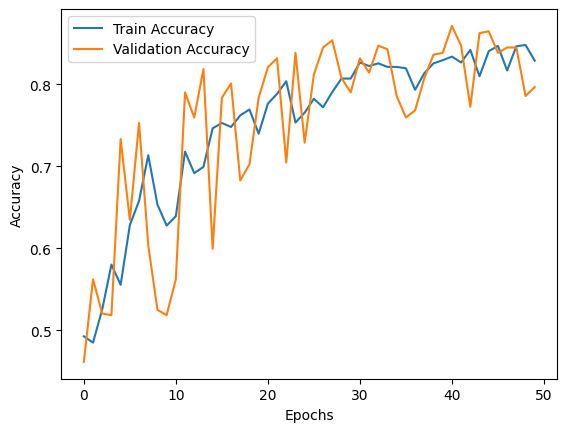

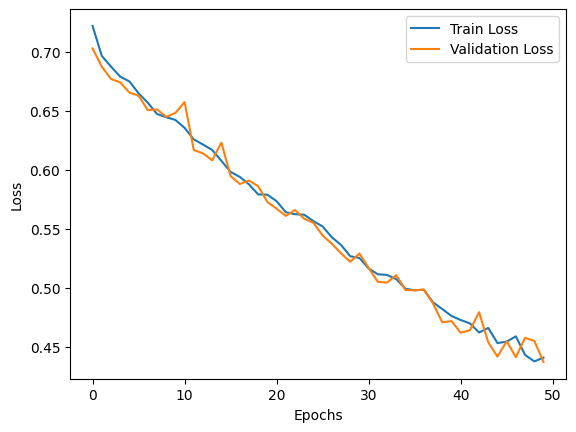

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Evaluate on validation set
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
print(f"Validation Loss: {val_loss:.4f}")

# Plot accuracy curve
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss curve
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


15/15 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step
Classification Report:
              precision    recall  f1-score   support

   Officials       0.51      0.67      0.58       220
   Wikipedia       0.57      0.40      0.47       237

    accuracy                           0.53       457
   macro avg       0.54      0.53      0.52       457
weighted avg       0.54      0.53      0.52       457



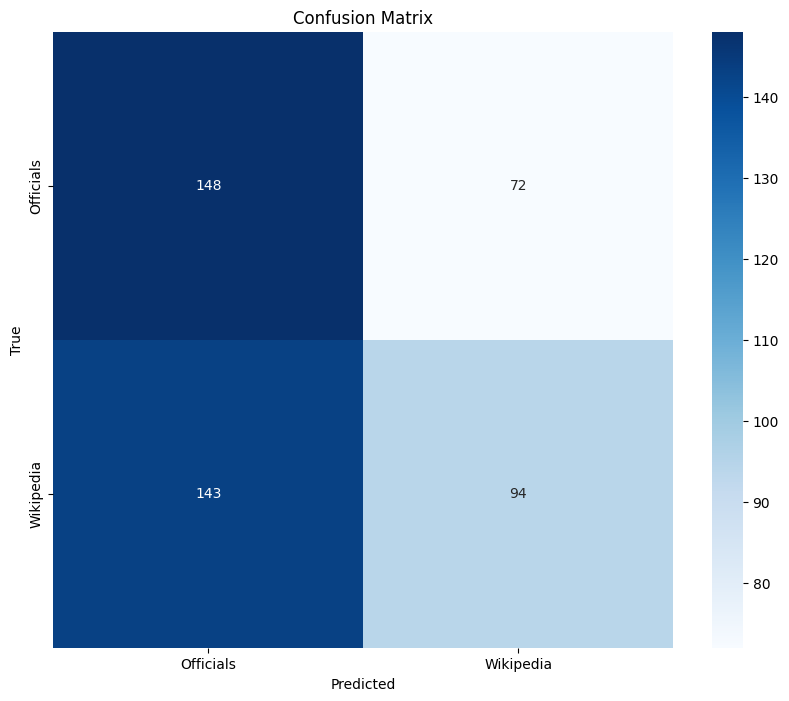

In [50]:
# Get predictions
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predict classes
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

# True labels
y_true = validation_generator.classes

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=list(validation_generator.class_indices.keys())))

# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys(), cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [55]:
# Save the model weights to a file after training
model.save_weights("scanner_model.weights.h5")
print("✅ Model weights saved successfully!")

✅ Model weights saved successfully!


In [57]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Define image size and number of classes
IMG_SIZE = (256, 256)
num_classes = 2  # Update based on your dataset

# Define the input shape for grayscale images
input_shape = (IMG_SIZE[0], IMG_SIZE[1], 1)

# Load the base ResNet50 model (without top layers) and use pre-trained ImageNet weights
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))

# Freeze the base model layers to prevent training during initial phase
for layer in base_model.layers:
    layer.trainable = False

# Create the model's input layer
inputs = Input(shape=input_shape)

# Convert grayscale images to 3 channels by repeating the single channel
x = Lambda(lambda x: tf.repeat(x, repeats=3, axis=-1))(inputs)

# Pass through the ResNet base model
x = base_model(x, training=False)

# Add pooling and dense layers for classification
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(num_classes, activation='softmax')(x)

# Define the full model
model = Model(inputs, outputs)

# Load the saved weights
model.load_weights("scanner_model.weights.h5")
print("✅ Model weights loaded successfully!")

# Compile the model again (optional, but recommended before training/evaluation)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Show the model summary
model.summary()


✅ Model weights loaded successfully!


Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)     │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_2 (Lambda)               │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 8, 8, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,850,242 (90.98 MB)

 Trainable params: 262,530 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [58]:
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
print(f"Validation Loss: {val_loss:.4f}")


15/15 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.8425 - loss: 0.4376
Validation Accuracy: 84.25%
Validation Loss: 0.4376


15/15 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.8665 - loss: 0.4286
✅ Validation Accuracy: 86.65%
✅ Validation Loss: 0.4286
15/15 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step
✅ Classification Report:
              precision    recall  f1-score   support

   Officials       0.52      0.50      0.51       220
   Wikipedia       0.55      0.57      0.56       237

    accuracy                           0.53       457
   macro avg       0.53      0.53      0.53       457
weighted avg       0.53      0.53      0.53       457



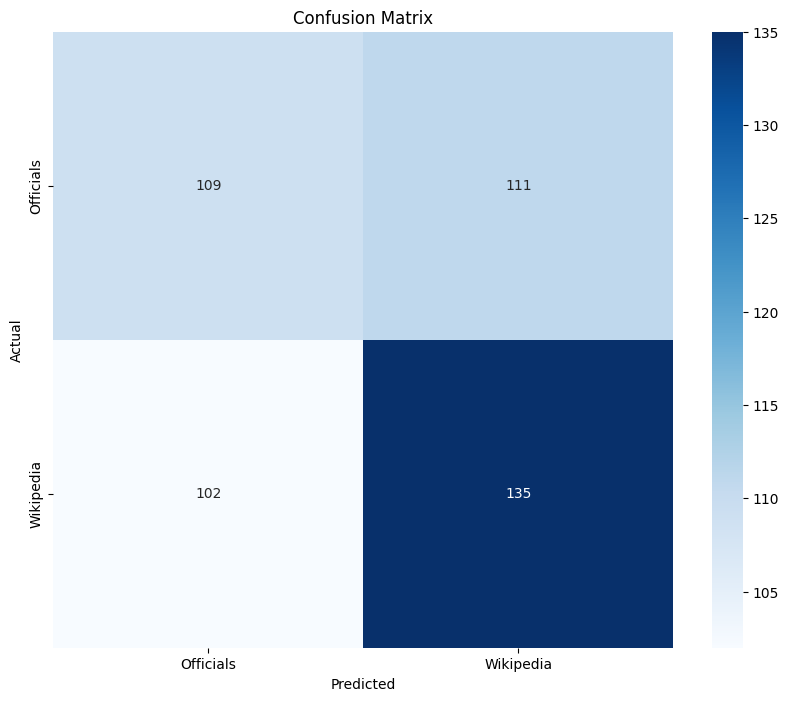

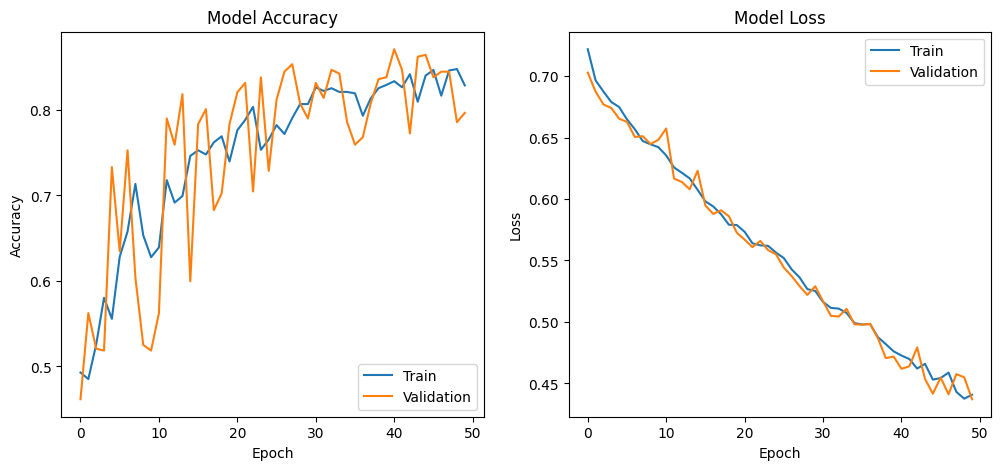

In [59]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Evaluate using model.evaluate (gives loss and accuracy directly)
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"✅ Validation Accuracy: {val_accuracy * 100:.2f}%")
print(f"✅ Validation Loss: {val_loss:.4f}")

# 2. Get predictions on the validation data
y_true = validation_generator.classes  # True labels
y_pred_probs = model.predict(validation_generator)  # Predicted probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

# 3. Classification Report (precision, recall, F1-score)
print("✅ Classification Report:")
print(classification_report(y_true, y_pred, target_names=list(validation_generator.class_indices.keys())))

# 4. Confusion Matrix visualization
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=list(validation_generator.class_indices.keys()), 
            yticklabels=list(validation_generator.class_indices.keys()), cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 5. Plot Accuracy and Loss Curves if you have the history object from training
if 'history' in globals():
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='lower right')
    
    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    
    plt.show()


In [19]:
from tensorflow.keras.layers import Concatenate, Input, Dense, Flatten
from tensorflow.keras.models import Model

# CNN branch (using previously defined base_model)
cnn_input = Input(shape=(256, 256, 1))
x = Lambda(lambda x: tf.repeat(x, 3, axis=-1))(cnn_input)
x = base_model(x, training=False)
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)

# Handcrafted features branch (example with 10 features)
num_handcrafted_features = 10  # Replace with actual number
handcrafted_input = Input(shape=(num_handcrafted_features,))
y = Dense(64, activation='relu')(handcrafted_input)

# Combine branches
combined = Concatenate()([x, y])
z = Dense(64, activation='relu')(combined)
output = Dense(num_classes, activation='softmax')(z)

# Final model
hybrid_model = Model(inputs=[cnn_input, handcrafted_input], outputs=output)

# Compile model
hybrid_model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])


In [73]:
print("Shape of sample_image:", sample_image.shape)


Shape of sample_image: (256, 256)


In [78]:
# Print the model summary to find the correct layer name
model.summary()

# Also print the base model summary if you're using ResNet50 as base
base_model.summary()


Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)     │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_2 (Lambda)               │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 8, 8, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,237,960 (161.13 MB)

 Trainable params: 9,193,858 (35.07 MB)

 Non-trainable params: 14,656,384 (55.91 MB)

 Optimizer params: 18,387,718 (70.14 MB)

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12      │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer_12[0… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 8,931,328 (34.07 MB)

 Non-trainable params: 14,656,384 (55.91 MB)

In [79]:
import numpy as np

# Print the shape of sample_image
print("Shape of sample_image:", sample_image.shape)

# Expand dimensions to match model input
img_array = np.expand_dims(sample_image, axis=0)  # (1, 256, 256)
img_array = np.expand_dims(img_array, axis=-1)    # (1, 256, 256, 1)

print("New shape of img_array:", img_array.shape)
print("Model input shape:", model.input_shape)


Shape of sample_image: (256, 256)
New shape of img_array: (1, 256, 256, 1)
Model input shape: (None, 256, 256, 1)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Get the last convolutional layer from the base model (update name if needed)
# 'conv5_block3_out' is the last conv layer in ResNet50
last_conv_layer = base_model.get_layer('conv5_block3_out')

# Create a new model (grad_model) that outputs:
# 1. The feature maps from the last conv layer
# 2. The final predictions from the model
grad_model = Model(inputs=model.inputs, outputs=[last_conv_layer.output, model.output])

# Function to generate Grad-CAM heatmap for a given image and class index
def make_gradcam_heatmap(img_array, class_index):
    # Record operations for automatic differentiation
    with tf.GradientTape() as tape:
        # Forward pass through grad_model
        conv_outputs, predictions = grad_model(img_array)
        
        # Extract the prediction score for the target class
        loss = predictions[:, class_index]
    
    # Compute gradients of the loss w.r.t. last conv layer feature maps
    grads = tape.gradient(loss, conv_outputs)
    
    # Global average pooling of gradients across spatial dimensions (H, W)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    
    # Take the feature maps of the conv layer (first image in batch)
    conv_outputs = conv_outputs[0]
    
    # Weight the feature maps by importance of each channel (pooled gradients)
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    
    # Remove extra dimensions
    heatmap = tf.squeeze(heatmap)
    
    # Normalize the heatmap values to range [0, 1]
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    
    return heatmap.numpy()

In [7]:
import os

print("Current directory:", os.getcwd())
print("Files in directory:", os.listdir())


Current directory: c:\msys64\home\Raghav Thaman\internship\milestone_3
Files in directory: ['milestone_3.ipynb', 'scanner_id_model.h5', 'scanner_model.h5', 'scanner_model.weights.h5']


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Lambda, GlobalAveragePooling2D, Dense
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Define image size for input
IMG_SIZE = (256, 256)

# Number of output classes (update this according to your dataset)
num_classes = 2  

# Load pre-trained ResNet50 without the top (fully connected) layers
# - weights='imagenet': load weights trained on ImageNet
# - include_top=False: exclude the final classification layer
# - input_shape=(256, 256, 3): expects RGB images
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))

# Freeze the base model so its weights are not updated during training
for layer in base_model.layers:
    layer.trainable = False

# Define input for grayscale images (1 channel)
inputs = Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 1))

# Convert grayscale input (1 channel) to 3 channels by repeating values
x = Lambda(lambda x: tf.repeat(x, 3, axis=-1))(inputs)

# Pass through the pre-trained ResNet50 base model
x = base_model(x, training=False)

# Global average pooling reduces feature maps to a single vector per channel
x = GlobalAveragePooling2D()(x)

# Fully connected dense layer with ReLU activation
x = Dense(128, activation='relu')(x)

# Output layer with softmax activation for multi-class classification
outputs = Dense(num_classes, activation='softmax')(x)

# Build the final model
model = Model(inputs, outputs)

# Compile the model
# - Adam optimizer with low learning rate
# - categorical_crossentropy for multi-class classification
# - track accuracy during training
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Load saved weights from a previous training run
model.load_weights('scanner_model.weights.h5')
print("✅ Model weights loaded successfully!")

✅ Model weights loaded successfully!


In [12]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_3 (Lambda)               │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 8, 8, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,850,242 (90.98 MB)

 Trainable params: 262,530 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image size for resizing (all images will be resized to 256x256 pixels)
IMG_SIZE = (256, 256)

# Path to the preprocessed dataset (organized in subfolders by class)
data_path = r"C:\msys64\home\Raghav Thaman\internship\data\SUPATLANTIQUE_PROC\Preprocessed"

# Create an ImageDataGenerator for preprocessing
# - rescales pixel values to [0,1]
# - reserves 20% of the dataset for validation
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Create a generator for the validation set (20% split)
validation_generator = datagen.flow_from_directory(
    data_path,                # Directory containing the dataset
    target_size=IMG_SIZE,     # Resize images to (256, 256)
    color_mode="grayscale",   # Use grayscale images (single channel)
    batch_size=32,            # Number of images per batch
    class_mode="categorical", # Multi-class classification (one-hot encoded labels)
    subset="validation"       # Select the validation subset
)

# Print the mapping of class names to their numeric indices
print("Classes found:", validation_generator.class_indices)

Found 457 images belonging to 2 classes.
Classes found: {'Officials': 0, 'Wikipedia': 1}


In [14]:
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
print(f"Validation Loss: {val_loss:.4f}")


c:\msys64\home\Raghav Thaman\internship\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.9037 - loss: 0.3493
Validation Accuracy: 90.37%
Validation Loss: 0.3493


In [15]:
base_model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer_7[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image size for resizing (all images will be resized to 256x256 pixels)
IMG_SIZE = (256, 256)

# Path to preprocessed dataset (organized into subfolders by class)
preprocessed_data_path = r"C:\msys64\home\Raghav Thaman\internship\data\SUPATLANTIQUE_PROC\Preprocessed"

# Data generator with preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,              # Normalize pixel values to [0,1]
    validation_split=0.2,        # Reserve 20% of data for validation
    rotation_range=20,           # Random rotation up to 20 degrees
    brightness_range=[0.8, 1.2], # Random brightness adjustment
    horizontal_flip=True         # Random horizontal flipping
)

# Training generator (80% of data, with augmentation)
train_generator = train_datagen.flow_from_directory(
    preprocessed_data_path,      # Base directory containing subfolders per class
    target_size=IMG_SIZE,        # Resize images to match model input
    color_mode="grayscale",      # Use grayscale images (1 channel)
    batch_size=32,               # Number of images per batch
    class_mode="categorical",    # Multi-class classification (one-hot labels)
    subset="training"            # Select training split
)

# Validation generator (20% of data, without augmentation)
validation_generator = train_datagen.flow_from_directory(
    preprocessed_data_path,
    target_size=IMG_SIZE,
    color_mode="grayscale",
    batch_size=32,
    class_mode="categorical",
    subset="validation"          # Select validation split
)

Found 1832 images belonging to 2 classes.
Found 457 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import ResNet50       # Pretrained ResNet50 model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Number of output classes = number of categories in training dataset
num_classes = len(train_generator.class_indices)

# Input shape for grayscale images
input_shape = (IMG_SIZE[0], IMG_SIZE[1], 1)

# Load ResNet50 pretrained on ImageNet without the top classification layer
base_model = ResNet50(weights='imagenet', include_top=False, 
                      input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))

# Freeze base model layers to use as fixed feature extractor
for layer in base_model.layers:
    layer.trainable = False

# Input layer for grayscale images
inputs = Input(shape=input_shape)

# Convert grayscale (1 channel) to 3 channels by repeating
x = Lambda(lambda x: tf.repeat(x, 3, axis=-1))(inputs)

# Pass through pretrained ResNet50
x = base_model(x, training=False)

# Global average pooling to reduce spatial dimensions
x = GlobalAveragePooling2D()(x)

# Dense layer for learning task-specific features
x = Dense(128, activation='relu')(x)

# Output layer with softmax activation for multi-class classification
outputs = Dense(num_classes, activation='softmax')(x)

# Build model
model = Model(inputs, outputs)

# Compile with Adam optimizer and categorical crossentropy loss
model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Show model architecture
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda (Lambda)                 │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 8, 8, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,850,629 (90.98 MB)

 Trainable params: 262,917 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [23]:
from tensorflow.keras.callbacks import EarlyStopping

# Unfreeze last layers
for layer in base_model.layers[-20:]:
    layer.trainable = True

# Recompile
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fine-tune the model
history_finetune = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=30,
    callbacks=[early_stopping]
)

Epoch 1/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 182s 3s/step - accuracy: 0.8575 - loss: 0.4145 - val_accuracy: 0.5186 - val_loss: 0.7213
Epoch 2/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 169s 3s/step - accuracy: 0.9225 - loss: 0.2146 - val_accuracy: 0.5186 - val_loss: 0.7008
Epoch 3/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 171s 3s/step - accuracy: 0.9492 - loss: 0.1418 - val_accuracy: 0.5186 - val_loss: 0.6975
Epoch 4/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 166s 3s/step - accuracy: 0.9618 - loss: 0.1108 - val_accuracy: 0.5492 - val_loss: 0.6878
Epoch 5/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 155s 3s/step - accuracy: 0.9645 - loss: 0.1040 - val_accuracy: 0.5361 - val_loss: 0.6710
Epoch 6/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 159s 3s/step - accuracy: 0.9700 - loss: 0.0872 - val_accuracy: 0.6586 - val_loss: 0.5942
Epoch 7/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 162s 3s/step - accuracy: 0.9716 - loss: 0.0796 - val_accuracy: 0.9519 - val_loss: 0.3004
Epoch 8/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 167s 3s/step - accuracy: 0.9760 - loss: 0.0708 - val_accuracy: 0.8446 - v

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (256, 256)

# Path to your preprocessed test data directory
test_data_path = r"C:\msys64\home\Raghav Thaman\internship\data\SUPATLANTIQUE_PROC\Preprocessed"

# Create an ImageDataGenerator for the test set (only rescaling, no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create the test generator
test_generator = test_datagen.flow_from_directory(
    test_data_path,
    target_size=IMG_SIZE,
    color_mode="grayscale",
    batch_size=32,
    class_mode="categorical",
    shuffle=False,  # Important: don't shuffle for proper evaluation
    subset=None      # Using the whole dataset; ensure it's test data
)


Found 2289 images belonging to 2 classes.


In [ ]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda (Lambda)                 │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 8, 8, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,850,629 (90.98 MB)

 Trainable params: 262,917 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
print("Class indices:", test_generator.class_indices)
print("Number of classes:", test_generator.num_classes)

Class indices: {'Officials': 0, 'Wikipedia': 1}
Number of classes: 2


In [ ]:
# Number of output classes (set to 2 because dataset has 2 categories, e.g., Officials and Wikipedia)
num_classes = 2  # Update this if dataset changes

# --------------------------
# Input Layer
# --------------------------
# Model expects grayscale input images (1 channel).
# ResNet50 requires 3-channel (RGB) input, so we will later repeat this channel.
inputs = Input(shape=(256, 256, 1))

# --------------------------
# Channel Conversion Layer
# --------------------------
# Convert grayscale (1-channel) to 3-channel by repeating along the last axis.
# Example: (256, 256, 1) → (256, 256, 3)
x = Lambda(lambda x: tf.repeat(x, 3, axis=-1))(inputs)

# --------------------------
# Base Model (ResNet50)
# --------------------------
# Load pretrained ResNet50 (ImageNet weights).
# exclude fully-connected layers at the top (include_top=False).
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze base model layers (so weights from ImageNet are not updated during training).
for layer in base_model.layers:
    layer.trainable = False

# Pass the input through the pretrained ResNet50 model (feature extraction stage).
x = base_model(x, training=False)

# --------------------------
# Classification Head
# --------------------------
# Global Average Pooling reduces each feature map to a single number (reduces dimensions).
x = GlobalAveragePooling2D()(x)

# Dense layer with ReLU activation to learn task-specific features.
x = Dense(128, activation='relu')(x)

# Output layer with softmax for classification into 'num_classes'.
outputs = Dense(num_classes, activation='softmax')(x)

# --------------------------
# Final Model
# --------------------------
# Define the model by connecting inputs and outputs.
model = Model(inputs, outputs)

# Compile model:
# - Adam optimizer with learning rate = 0.0001
# - Categorical crossentropy (for multi-class classification)
# - Track accuracy as evaluation metric
model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [30]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

72/72 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - accuracy: 0.9026 - loss: 0.3475
Test Accuracy: 90.26%
Test Loss: 0.3475


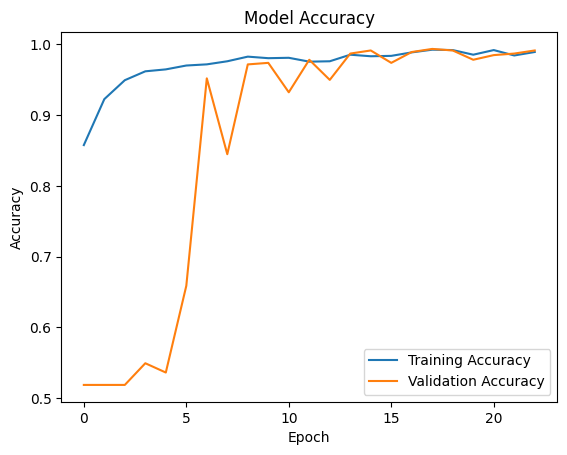

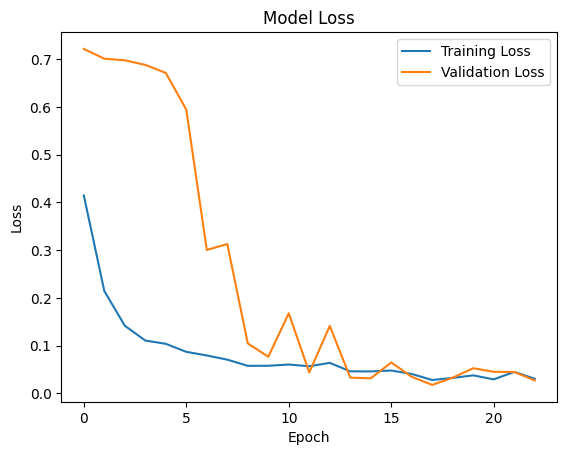

In [ ]:
import matplotlib.pyplot as plt

# --------------------------------------
# Plot Training & Validation Accuracy
# --------------------------------------
plt.plot(history_finetune.history['accuracy'], label='Training Accuracy')      # Accuracy during training
plt.plot(history_finetune.history['val_accuracy'], label='Validation Accuracy')# Accuracy on validation set
plt.title('Model Accuracy')            # Graph title
plt.xlabel('Epoch')                    # X-axis label
plt.ylabel('Accuracy')                 # Y-axis label
plt.legend()                           # Show legend (Training vs Validation)
plt.show()                             # Display plot

# --------------------------------------
# Plot Training & Validation Loss
# --------------------------------------
plt.plot(history_finetune.history['loss'], label='Training Loss')              # Training loss
plt.plot(history_finetune.history['val_loss'], label='Validation Loss')        # Validation loss
plt.title('Model Loss')                # Graph title
plt.xlabel('Epoch')                    # X-axis label
plt.ylabel('Loss')                     # Y-axis label
plt.legend()                           # Show legend (Training vs Validation)
plt.show()                             # Display plot

In [13]:
model.save('D:/final_scanner_model.keras')  # Example path with more space
print("✅ Model saved successfully!")

✅ Model saved successfully!


In [14]:
model.load_weights(r'D:\final_scanner_model.keras')
print("✅ Model weights loaded successfully!")

✅ Model weights loaded successfully!


In [29]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Lambda, GlobalAveragePooling2D, Dense
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Parameters
IMG_SIZE = (256, 256)
num_classes = 2
input_shape = (IMG_SIZE[0], IMG_SIZE[1], 1)

# Build model architecture
inputs = Input(shape=input_shape)
x = Lambda(lambda x: tf.repeat(x, repeats=3, axis=-1))(inputs)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
base_model.trainable = False
x = base_model(x, training=False)
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(num_classes, activation='softmax')(x)
model = Model(inputs, outputs)

# Load weights
model.load_weights("scanner_model.weights.h5")

# Compile
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Verify
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_4 (Lambda)               │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 8, 8, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,850,242 (90.98 MB)

 Trainable params: 262,530 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [33]:
for layer in base_model.layers[::-1]:  # iterate in reverse
    if 'conv' in layer.name:
        print(layer.name)


conv5_block3_out
conv5_block3_add
conv5_block3_3_bn
conv5_block3_3_conv
conv5_block3_2_relu
conv5_block3_2_bn
conv5_block3_2_conv
conv5_block3_1_relu
conv5_block3_1_bn
conv5_block3_1_conv
conv5_block2_out
conv5_block2_add
conv5_block2_3_bn
conv5_block2_3_conv
conv5_block2_2_relu
conv5_block2_2_bn
conv5_block2_2_conv
conv5_block2_1_relu
conv5_block2_1_bn
conv5_block2_1_conv
conv5_block1_out
conv5_block1_add
conv5_block1_3_bn
conv5_block1_0_bn
conv5_block1_3_conv
conv5_block1_0_conv
conv5_block1_2_relu
conv5_block1_2_bn
conv5_block1_2_conv
conv5_block1_1_relu
conv5_block1_1_bn
conv5_block1_1_conv
conv4_block6_out
conv4_block6_add
conv4_block6_3_bn
conv4_block6_3_conv
conv4_block6_2_relu
conv4_block6_2_bn
conv4_block6_2_conv
conv4_block6_1_relu
conv4_block6_1_bn
conv4_block6_1_conv
conv4_block5_out
conv4_block5_add
conv4_block5_3_bn
conv4_block5_3_conv
conv4_block5_2_relu
conv4_block5_2_bn
conv4_block5_2_conv
conv4_block5_1_relu
conv4_block5_1_bn
conv4_block5_1_conv
conv4_block4_out
conv4

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # Get the last conv layer
    last_conv_layer = model.get_layer(last_conv_layer_name)
    
    # Create a model that maps the input image to the activations of the last conv layer
    # and the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [last_conv_layer.output, model.output]
    )
    
    # Compute the gradient of the output with respect to the last conv layer
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]
    
    # Get the gradients of the target class output value with respect to the last conv layer
    grads = tape.gradient(class_channel, conv_outputs)
    
    # Pool the gradients over all the axes except the channel axis
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    
    # Multiply each channel by its importance and sum up
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    
    # Normalize the heatmap between 0 and 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


In [ ]:
# Access the base ResNet50 model inside your model
base_model = model.get_layer("resnet50")

# Print convolutional layer names
for layer in base_model.layers[::-1]:  # Check layers from the end
    if 'conv' in layer.name:
        print(layer.name)


conv5_block3_out
conv5_block3_add
conv5_block3_3_bn
conv5_block3_3_conv
conv5_block3_2_relu
conv5_block3_2_bn
conv5_block3_2_conv
conv5_block3_1_relu
conv5_block3_1_bn
conv5_block3_1_conv
conv5_block2_out
conv5_block2_add
conv5_block2_3_bn
conv5_block2_3_conv
conv5_block2_2_relu
conv5_block2_2_bn
conv5_block2_2_conv
conv5_block2_1_relu
conv5_block2_1_bn
conv5_block2_1_conv
conv5_block1_out
conv5_block1_add
conv5_block1_3_bn
conv5_block1_0_bn
conv5_block1_3_conv
conv5_block1_0_conv
conv5_block1_2_relu
conv5_block1_2_bn
conv5_block1_2_conv
conv5_block1_1_relu
conv5_block1_1_bn
conv5_block1_1_conv
conv4_block6_out
conv4_block6_add
conv4_block6_3_bn
conv4_block6_3_conv
conv4_block6_2_relu
conv4_block6_2_bn
conv4_block6_2_conv
conv4_block6_1_relu
conv4_block6_1_bn
conv4_block6_1_conv
conv4_block5_out
conv4_block5_add
conv4_block5_3_bn
conv4_block5_3_conv
conv4_block5_2_relu
conv4_block5_2_bn
conv4_block5_2_conv
conv4_block5_1_relu
conv4_block5_1_bn
conv4_block5_1_conv
conv4_block4_out
conv4

Available layers in model:
0: input_layer_6 - <class 'keras.src.layers.core.input_layer.InputLayer'>
1: lambda_4 - <class 'keras.src.layers.core.lambda_layer.Lambda'>
2: resnet50 - <class 'keras.src.models.functional.Functional'>
3: global_average_pooling2d_3 - <class 'keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D'>
4: dense_8 - <class 'keras.src.layers.core.dense.Dense'>
5: dense_9 - <class 'keras.src.layers.core.dense.Dense'>

Found ResNet50: resnet50

Available layers in resnet50:
0: conv5_block3_1_conv - <class 'keras.src.layers.convolutional.conv2d.Conv2D'>
1: conv5_block3_1_bn - <class 'keras.src.layers.normalization.batch_normalization.BatchNormalization'>
2: conv5_block3_1_relu - <class 'keras.src.layers.activations.activation.Activation'>
3: conv5_block3_2_conv - <class 'keras.src.layers.convolutional.conv2d.Conv2D'>
4: conv5_block3_2_bn - <class 'keras.src.layers.normalization.batch_normalization.BatchNormalization'>
5: conv5_block3_2_relu - <class 

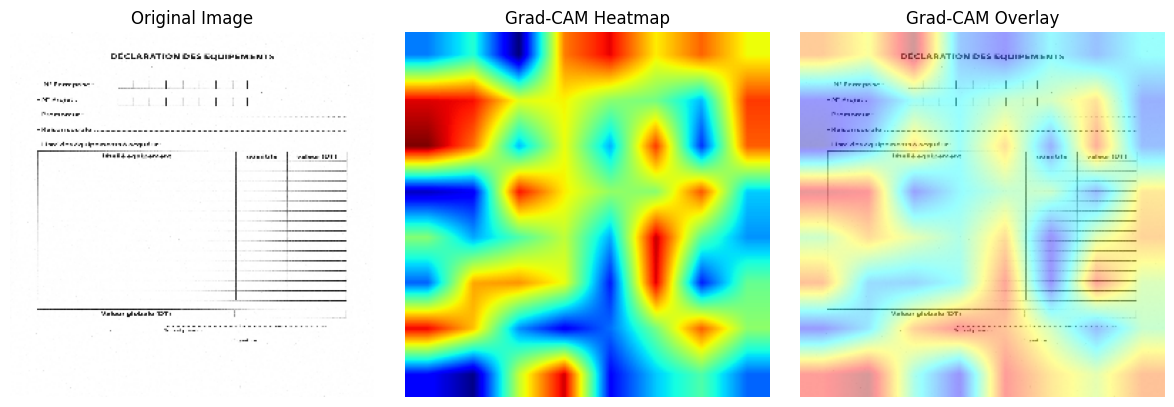

In [52]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Step 1 – Get base model and last conv layer
# First, let's check what layers are available
print("Available layers in model:")
for i, layer in enumerate(model.layers):
    print(f"{i}: {layer.name} - {type(layer)}")

# Try to get the ResNet50 base model
try:
    base_model = model.get_layer("resnet50")
    print(f"\nFound ResNet50: {base_model.name}")
except:
    # If "resnet50" doesn't exist, try other common names
    resnet_layer = None
    for layer in model.layers:
        if 'resnet' in layer.name.lower() or isinstance(layer, tf.keras.applications.ResNet50):
            resnet_layer = layer
            break
    
    if resnet_layer:
        base_model = resnet_layer
        print(f"\nFound ResNet layer: {base_model.name}")
    else:
        print("No ResNet layer found!")
        # List all layers to help debug
        raise ValueError("Could not find ResNet base model")

# Get the last convolutional layer
print(f"\nAvailable layers in {base_model.name}:")
for i, layer in enumerate(base_model.layers[-10:]):  # Show last 10 layers
    print(f"{i}: {layer.name} - {type(layer)}")

try:
    last_conv_layer = base_model.get_layer("conv5_block3_out")
    print(f"\nUsing conv layer: {last_conv_layer.name}")
except:
    # Try alternative names for the last conv layer
    possible_names = ["conv5_block3_out", "conv5_block3_3_conv", "conv5_block3_add", "conv5c", "conv5"]
    last_conv_layer = None
    
    for name in possible_names:
        try:
            last_conv_layer = base_model.get_layer(name)
            print(f"\nFound conv layer with name: {name}")
            break
        except:
            continue
    
    if last_conv_layer is None:
        # Get the last convolutional layer
        for layer in reversed(base_model.layers):
            if 'conv' in layer.name.lower() and len(layer.output_shape) == 4:
                last_conv_layer = layer
                print(f"\nUsing last conv layer found: {layer.name}")
                break
        
        if last_conv_layer is None:
            raise ValueError("Could not find a suitable convolutional layer")

# Step 2 – Build grad_model
grad_model = tf.keras.models.Model(
    inputs=model.inputs,
    outputs=[last_conv_layer.output, model.output]
)

# Step 3 – Grad-CAM function (keep grayscale)
def make_gradcam_heatmap(img_array, grad_model, pred_index=None):
    # Ensure proper data type and shape
    img_tensor = tf.convert_to_tensor(img_array, dtype=tf.float32)
    
    # Watch the conv layer output
    with tf.GradientTape() as tape:
        # Get model outputs
        conv_outputs, predictions = grad_model(img_tensor, training=False)
        
        # Get the predicted class
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        
        # Get the score for the predicted class
        class_channel = predictions[:, pred_index]
    
    # Calculate gradients
    grads = tape.gradient(class_channel, conv_outputs)
    
    # Handle None gradients
    if grads is None:
        print("Warning: Gradients are None. Check if the model is trainable.")
        return np.zeros((7, 7))  # Return dummy heatmap
    
    # Global average pooling on gradients
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    
    # Multiply feature maps by gradients
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    
    # Apply ReLU and normalize
    heatmap = tf.maximum(heatmap, 0) / (tf.math.reduce_max(heatmap) + 1e-10)
    
    return heatmap.numpy()

# Step 4 – Pick an image
img, label = test_generator[0]
img_array = img[0:1]  # Keep original grayscale (1, H, W, 1)

print(f"Image shape: {img_array.shape}")
print(f"Image range: [{img_array.min():.3f}, {img_array.max():.3f}]")

# Step 5 – Generate heatmap (use grayscale input)
try:
    heatmap = make_gradcam_heatmap(img_array, grad_model)
    print(f"Heatmap shape: {heatmap.shape}")
    print(f"Heatmap range: [{heatmap.min():.3f}, {heatmap.max():.3f}]")
except Exception as e:
    print(f"Error generating heatmap: {e}")
    # Create a dummy heatmap for visualization
    heatmap = np.random.random((8, 8))
    print("Using dummy heatmap for debugging")

# Step 6 – Visualize
img_original = np.squeeze(img_array)  # (H, W)
heatmap_resized = cv2.resize(heatmap, (img_original.shape[1], img_original.shape[0]))
heatmap_color = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)

# Convert grayscale to RGB for visualization only
img_rgb = cv2.cvtColor(np.uint8(img_original * 255), cv2.COLOR_GRAY2RGB)
superimposed_img = cv2.addWeighted(img_rgb, 0.6, heatmap_color, 0.4, 0)

plt.figure(figsize=(12, 4))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(img_original, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Heatmap
plt.subplot(1, 3, 2)
plt.imshow(heatmap_resized, cmap='jet')
plt.title('Grad-CAM Heatmap')
plt.axis('off')

# Overlay
plt.subplot(1, 3, 3)
plt.imshow(superimposed_img)
plt.title('Grad-CAM Overlay')
plt.axis('off')

plt.tight_layout()
plt.show()